In [238]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Data Set 1


In [239]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


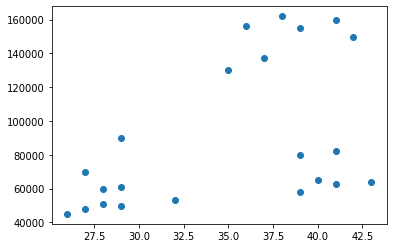

In [240]:
plt.scatter(df['Age'],df['Income($)'])


In [241]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [242]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [243]:
#appending new row in data
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [244]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

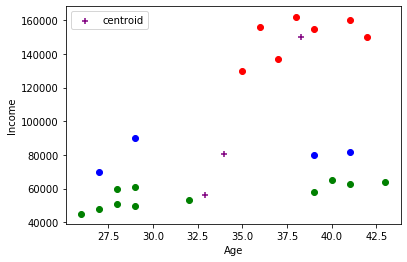

In [245]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [246]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [247]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [248]:
df['cluster'] = y_predicted 
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [249]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

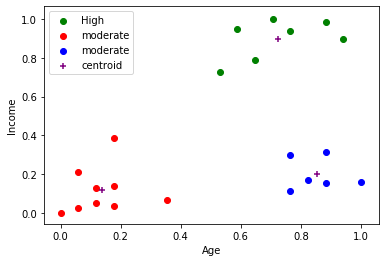

In [250]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='High')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='moderate')
plt.scatter(df3.Age,df3['Income($)'],color='blue',label='moderate')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [251]:
#plotting ELBOW plot
k_rng = range(1,10)
sse = []
for k in k_rng:
    km =  KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) 


In [252]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.21055478995472493,
 0.18281784627753636,
 0.14247582522543334,
 0.10383752586603559]

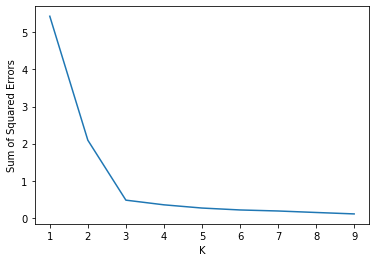

In [253]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)

# Data Set 2

In [254]:
from sklearn.datasets import load_iris

In [255]:
iris = load_iris()

In [256]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [257]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [258]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [259]:
df.drop(['sepal length (cm)','sepal width (cm)','flower'],axis = 'columns',inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


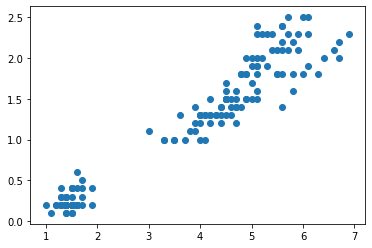

In [260]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [261]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [262]:
df['cluster'] = yp
df


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [263]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.462     , 0.246     ]])

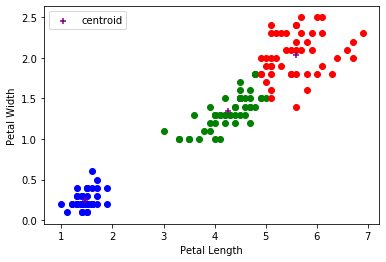

In [264]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [265]:
#plotting ELBOW plot
k_rng = range(1,10)
sse = []
for k in k_rng:
    km =  KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_) 

In [266]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.084575219743067,
 9.191170634920635,
 7.725896825396826,
 6.480259206692711]

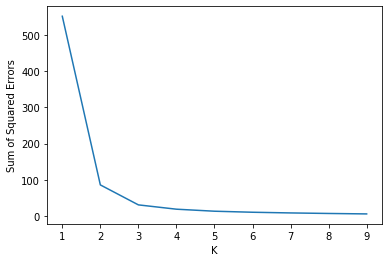

In [267]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)

# Data Set3 

In [268]:
df = pd.read_csv('headbrain.csv')

In [269]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [270]:
df.drop(['Gender','Age Range'], axis = 'columns' , inplace=True)
df

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


In [271]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [272]:
df['cluster'] = yp
df


,Head Size(cm^3),Brain Weight(grams),cluster
0,4512,1530,1
1,3738,1297,2
2,4261,1335,1
3,3777,1282,2
4,4177,1590,1
...,...,...,...
232,3214,1110,0
233,3394,1215,0
234,3233,1104,0
235,3352,1170,0


In [273]:
km.cluster_centers_

array([[3248.15      , 1170.075     ],
       [4147.39215686, 1413.98039216],
       [3678.17924528, 1304.9245283 ]])

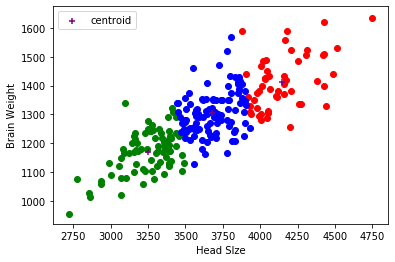

In [275]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Head Size(cm^3)'],df1['Brain Weight(grams)'],color='green')
plt.scatter(df2['Head Size(cm^3)'],df2['Brain Weight(grams)'],color='red')
plt.scatter(df3['Head Size(cm^3)'],df3['Brain Weight(grams)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('Head SIze')
plt.ylabel('Brain Weight')
plt.legend()
plt.show()

In [276]:
#plotting ELBOW plot
k_rng = range(1,10)
sse = []
for k in k_rng:
    km =  KMeans(n_clusters=k)
    km.fit(df[['Head Size(cm^3)','Brain Weight(grams)']])
    sse.append(km.inertia_) 

In [277]:
sse

[34903864.185654,
 12994263.40947717,
 7398345.87782094,
 4959190.209823075,
 3590362.3395089516,
 2944599.2398073347,
 2450373.4067120813,
 2093775.4456179682,
 1851430.7893567835]

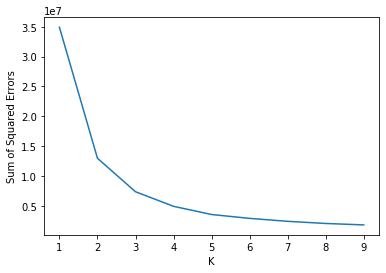

In [278]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)